# Module 1 - DNA sequencing, strings, and matching

In [62]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import Bio
import pandas as pd
import os

In [1]:
!wget --no-check 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'

--2024-03-19 12:08:46--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.167, 18.155.188.60, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.07s   

2024-03-19 12:08:47 (710 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



### making a genome reader function 

In [5]:
def read_genome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>': #don't want the description
                genome += line.rstrip() #removes whitespace
    return genome

In [25]:
genome = read_genome('lambda_virus.fa')
len(genome)

48502

#### counting the frequency of each base

In [29]:


#[genome.count(key) for key in counts]

#here's one way to do it 
counts= {'A':0, 'T':0, 'G':0,'C':0}
for base in counts:
    counts[base] = genome.count(base)
print(counts)

#here's another way 
counts= {'A':0, 'T':0, 'G':0,'C':0}
for base in genome:
    counts[base] +=1
counts

#here's a third way 
import collections
collections.Counter(genome) 

{'A': 12334, 'T': 11986, 'G': 12820, 'C': 11362}


Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## looking at sequence reads in FASTQ format

In [6]:
# identifiers
# seq
# filler
# qualities - ASCII-encoded Q (quality)

def QtoPhred33(Q):
    return chr(Q+33)

def Phred33toQ(qual):
    return ord(qual)-33

In [36]:
# getting the example fastq file 
!wget 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq'

--2024-03-19 12:43:35--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.60, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  1.30MB/s    in 0.2s    

2024-03-19 12:43:35 (1.30 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



### reading the fastq

In [38]:
# example below 

@ERR266411.1 HS18_09233:8:1307:10911:3848#168/1
TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC
+
B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG

In [63]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as fh:
        while True: #while file is reading lines 
            fh.readline() #first line is descriptor
            seq = fh.readline().rstrip() # second is sequence
            fh.readline() #third is spaceholder
            qual = fh.readline().rstrip() #4th is quality 
            if len(seq)  == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [74]:
# get all seqs and quals
seqs, quals = read_fastq('ERR266411_1.first1000.fastq')

### investigating quality scores

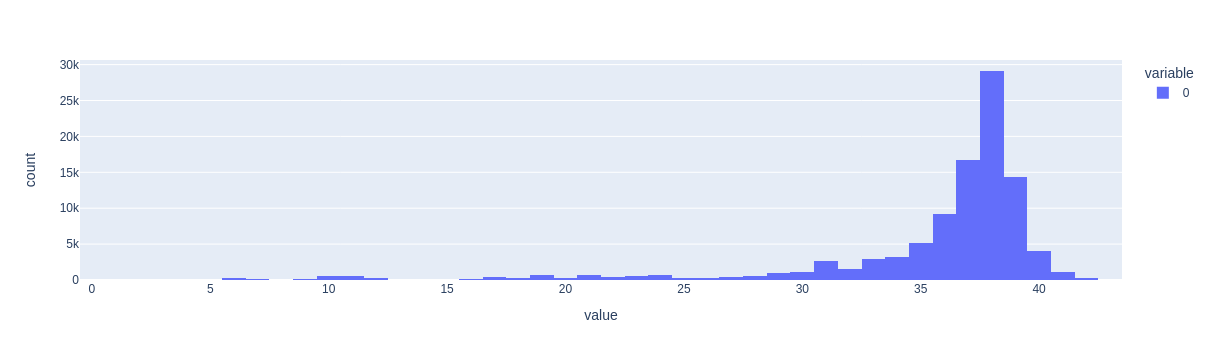

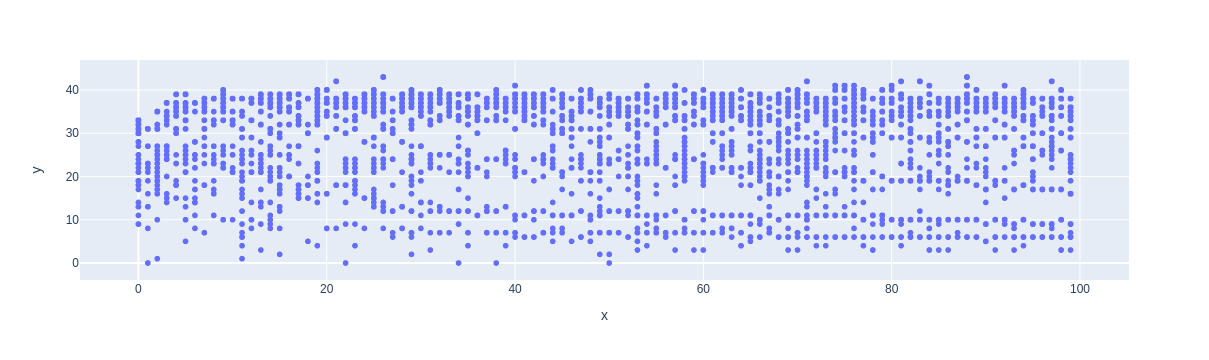

In [105]:
#get histogram of quals

indices= []
base_quals = []
for read_qual in quals: #this will look at each read 
    i= 0
    for base_qual in read_qual:
        indices.append(i)
        base_quals.append(phred33toQ(base_qual))
        i +=1
fig1 = px.histogram(base_quals, width = 500)
fig1.show()
fig2  = px.scatter(x= indices,y = base_quals, width = 500)
fig2.show()

(array([4.6000e+01, 3.8300e+02, 1.5300e+03, 6.3900e+02, 1.8270e+03,
        2.0230e+03, 3.2160e+03, 1.0225e+04, 6.0213e+04, 1.9898e+04]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

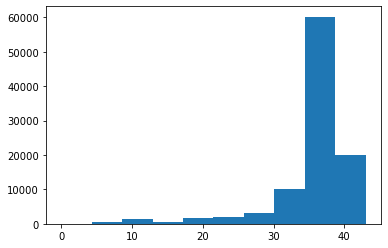

In [97]:
plt.hist(base_quals)

### Finding GC content by position

In [106]:
len(seqs)

1000

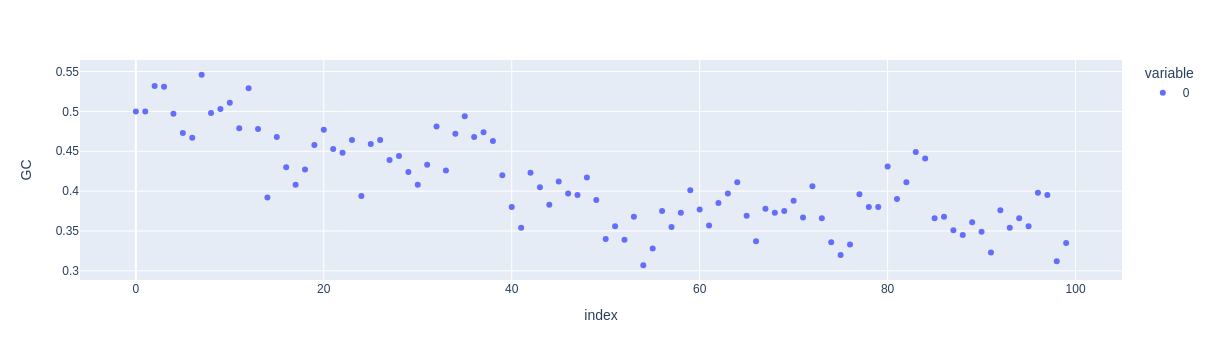

In [132]:
def findGCByPos(reads): #finds average GC content (over all reads??) for cumulative up to specified position/...who would use this 
    gc = [0] * 100 # makes a list of 100 zeroes
    totals =  [0] * 100
    for read in reads: #for each read
        for i in range(len(read)): #run though the read and increment both GC and total count
            if read[i] == 'C' or read[i] == 'G':
                gc[i] +=1 #will increment the GC count 
            totals[i] +=1 # will increment the total count
    for i in range(len(gc)):
        if totals[i] >0:
            gc[i] /= float(totals[i])
    return gc


gc = findGCByPos(seqs)
px.scatter(gc, labels ={'value':'GC'}, width = 500)

In [134]:
counts= {'A':0, 'T':0, 'G':0,'C':0}
for seq in seqs:
    counts.update(seq)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

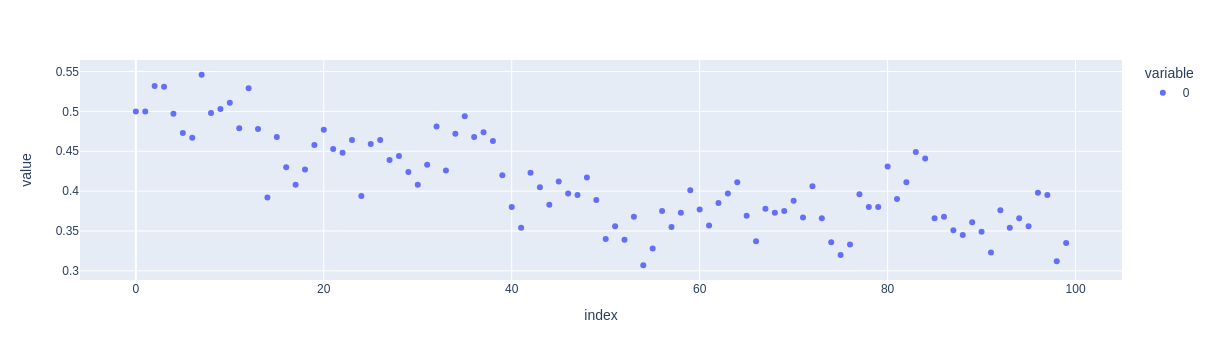

## Alignment  - Naive Exact Matching

In [11]:
# finding the offset of a pattern
t = 'The %%ai magic works anywhere the IPython kernel runs, including JupyterLab, Jupyter Notebook, Google Colab, and Visual Studio Code.'
t.find('code') #gives the last index of the first occurence of the word 

#what's an algorithm for exact matching? 
def naive(p,t): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        #print(i)
        match = True
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                match  = False
                break
        if match:
            occurences.append(i)
    return occurences 

naive('Code',t)

# try every possible offset (check each substring to see if it matches )

[127]

In [3]:
pip install jupyter-ai

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.3/929.3 kB 13.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:0031m31.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:0031m27.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 28.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.0 MB/s eta 0:00:0031m50.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

### using naive exact matching to align reads to a genome


In [56]:
reverse_complement('ATT')

'AAT'

In [7]:
def reverse_complement(seq):
    complement = {'A':'T', 'T':'A','G':'C', 'C':'G', 'N':'N'}
    t = ''
    for base in seq:
        t = complement[base] + t 
    return t

def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as fh:
        while True: #while file is reading lines 
            fh.readline() #first line is descriptor
            seq = fh.readline().rstrip() # second is sequence
            fh.readline() #third is spaceholder
            qual = fh.readline().rstrip() #4th is quality 
            if len(seq)  == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [20]:
reads, quals = read_fastq('ERR266411_1.first1000.fastq') #not actually sure if these reads are from this genome - there was some weird stuff in the downloads


In [67]:
num_matched = 0 #number of reads that match exactly
n = 0

for read in reads:
    r = read[:10] #take a subset of the read 
    
    
    matches = naive(r, genome) #checking if first 30bp match
    matches.extend(naive(reverse_complement(r),genome)) #this adds a check for reverse complement to matches
    n +=1 
    if len(matches)>0: #if we get more than 1 match then increment num_matched
        num_matched +=1 

print ('fraction matching exactly = ', (num_matched/n))

fraction matching exactly =  0.169


## Quiz

In [71]:
#Which of the following is not a substring of GCTCAGCGGGGCA?

substrings = ['GCG','GCT','GCC','GCA']
string  = 'GCTCAGCGGGGCA'

for substring in substrings:
    if string.find(substring) == False:
        print (substring)

GCT


## Programming homework

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [9]:
text1 = 'CGAGCTTGCGCAAGGATAGGTCGAATTTTCTCATTTTCCGCCAGCAGTCCACTTCGATTTAATTCGTAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCG'
text2 = 'AACGTTAACGTTAACGTT' #contains an identical reverse complement: palindromes 

In [10]:
def naive_with_rc(p,t): #looks for pattern p in text
    occurences = []
    p_rc  = reverse_complement(p) #generate reverse complement
    if p == p_rc:
        #look only for forward
        query_list = [p]
    else: #look for both forward and reverse 
        query_list = [p,p_rc]
    for p in query_list:
        print(p)
        for i in range(len(t)-len(p) + 1): # loop over all alignments
            #print(i)
            match = True
            for j in range(len(p)): #loop over chars in pattern p 
                if t[i+j] != p[j]: #if index in t isn't p
                    match  = False
                    break
            if match:
                occurences.append(i)
    return occurences 


a = naive_with_rc('AACGTT',text2)
b = naive('AACGTT',text2)

AACGTT


NameError: name 'naive' is not defined

In [152]:
print (a,b)

[0, 6, 12] [0, 6, 12]


## homework quiz

In [63]:
! wget 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
genome = read_genome('lambda_virus.fa')

--2024-03-25 09:41:10--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.175, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.3’

lambda_virus.fa.3   100%[===================>]  48.12K  --.-KB/s    in 0.06s   

2024-03-25 09:41:11 (780 KB/s) - ‘lambda_virus.fa.3’ saved [49270/49270]



#### Question 1
How many times does 
AGGT
AGGT or its reverse complement (
ACCT
ACCT) occur in the lambda virus genome?  E.g. if 
AGGT
AGGT occurs 10 times and 
ACCT
ACCT occurs 12 times, you should report 22.

In [72]:
a = naive_with_rc('AGGT', genome)
#a = naive('AGTCGA', genome)
print(len(a))

AGGT
ACCT
306


#### Question 2
How many times does 
TTAA
TTAA or its reverse complement occur in the lambda virus genome?  

Hint: 
TTAA
TTAA and its reverse complement are equal, so remember not to double count.

In [73]:
a = naive_with_rc('AGGT', genome)
#a = naive('AGTCGA', genome)
print(len(a))

TTAA
195


#### Question 3
What is the offset of the leftmost occurrence of 
ACTAAGT
ACTAAGT or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of 
ACTAAGT
ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement 
ACTTAGT
ACTTAGT is at offset 29, then report 29.

In [77]:
a = naive_with_rc('ACTAAGT', genome)
#a = naive('AGTCGA', genome)
print(len(a))
a
min(a)

ACTAAGT
ACTTAGT
3


26028

#### Question 4
What is the offset of the leftmost occurrence of 
AGTCGA
AGTCGA or its reverse complement in the Lambda virus genome?



In [79]:
a = naive_with_rc('AGTCGA', genome)
#a = naive('AGTCGA', genome)
print(len(a))
min(a)

AGTCGA
TCGACT
9


450

#### Question 5

As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the 
naive
naive function called 
naive_2mm
naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, 
ACTTTA
ACTTTA occurs twice in 
ACTTACTTGATAAAGT
ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So 
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')
naive_2mm(’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list 
[0, 4]
[0, 4].

Hint: See 
 this notebook http://nbviewer.ipython.org/github/BenLangmead/ads1-hw-examples/blob/master/hw1_naive_2mm.ipynb
 for a few examples you can use to test your 
naive_2mm
naive_2mm function.

How many times does 
TTCAAGCC
TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [82]:
#what's an algorithm for exact matching? 


# a dumb way to do this would be to generate all sequences with up to n mismatches - wow that's a lot! 
# is there a way to do it more efficiently? 


def naive_2mm(p,t, mismatch_tolerance): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        mismatches = 0 
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                mismatches += 1 
        if mismatches <= mismatch_tolerance:
            occurences.append(i) 
    return occurences 

In [83]:
query = 'ATG'
text = 'ACCATG'
a = naive_2mm('TTCAAGCC',genome,2)
len(a)

191

#### Question 6
What is the offset of the leftmost occurrence of 
AGGAGGTT
AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [91]:
a = naive_2mm('AGGAGGTT',genome,2)
len(a)
min(a)


genome[49:(49+len('AGGAGGTT'))]

'AGGCGTTT'

In [92]:
49+len('AGGAGGTT')

57

### final quiz question

### Description
Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [1]:
!wget 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'

--2024-03-25 09:20:33--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.60, 18.155.188.175, 18.155.188.170, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  1.24MB/s    in 0.2s    

2024-03-25 09:20:34 (1.24 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [23]:
seqs, phreds = read_fastq('ERR037900_1.first1000.fastq')
print ('there are', len(seqs), 'sequences in this ERR037900_1.first1000.fastq')

there are 1000 sequences in this ERR037900_1.first1000.fastq


(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([ 99.5,  99.6,  99.7,  99.8,  99.9, 100. , 100.1, 100.2, 100.3,
        100.4, 100.5]),
 <BarContainer object of 10 artists>)

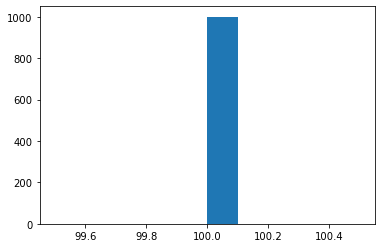

In [18]:
# let's check the dist of read length
plt.hist([len(seq) for seq in seqs]) #all 100bp

### checking read quality

In [27]:
quals = []
for phred in phreds:
    qual_list = []
    for phred_char in phred:
        qual_list.append(Phred33toQ(phred_char))
    quals.append(qual_list)

In [60]:
df = pd.DataFrame(quals).melt()
df.columns = ['position','score']
group = df.groupby('position').agg(['mean','std'])


group.columns = group.columns.map('_'.join)
group = group.reset_index()

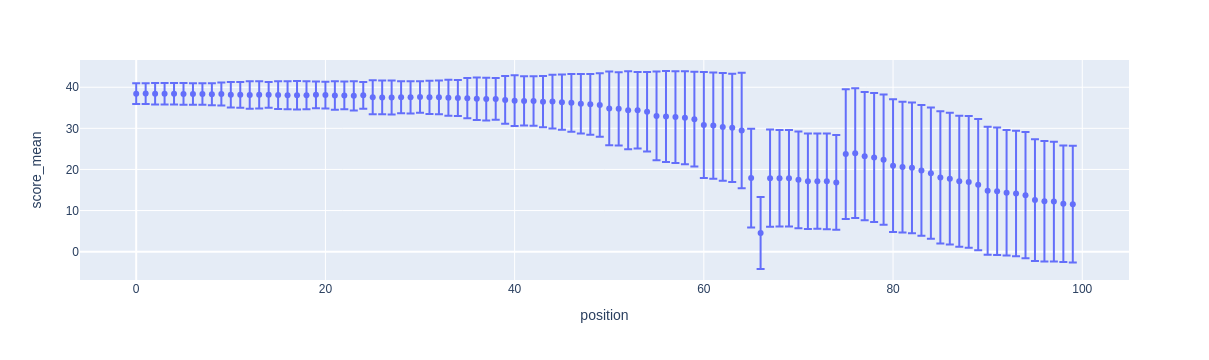

In [62]:
px.scatter(group, x = 'position', y = 'score_mean', error_y='score_std')

# Module 2: Preprocessing, indexing, and exact matching

## Algorithms for more efficient matchign

### Naive exact matching


In [29]:
def naive(p,t): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        #print(i)
        match = True
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                match  = False
                break
        if match:
            occurences.append(i)
    return occurences 

p = 'cde'
t = 'abcdefgh'
naive(p,t)

[2]

### Boyer-Moore 
- Skips many alignments that are unneccesary
- Learn from unfruitful character comparisons to skip pointless alignments; alignments in left to right, but character comparisons in right to left
- Bad character rule: upon mismatch, skip alignments until mismatch becomes a match, or pattern p moves past mismatched character
- Good suffix rule: t is a substring suffix in T that is matched; skip alignments until there are no mismatches between p and t (basically, shift p so no matches turn into mis-matches )


#### boyer-moore pseudocode
1. Align P over T from left to right
2. Make character comparisons
3. If character matches, continue
4. If character mismatches, take max between bad char and good suffix rule

#### bad character 
- check if misatch occurs at i in t and j in p
- if not, continue to j-1/i-1
- if yes, find the the j that matches i, and skip alignments between


#### good suffix 
- when mismatch is found
- define suffix by slicing from mismatch +1:end of pattern 
- find next offset of suffix
- shift accordingling

In [290]:
# t_i is the letter at position i
# j is the offset we are currently at in pattern 
def bad_character(t_i,j,pattern): 
    next_offset = pattern.rfind(t_i,0,j) # looks in pattern for the match, starting at 0, and ending at j
    print('bad character next offset', next_offset)
    if next_offset > 0: 
        shift = j - next_offset
    else:
        shift = len(pattern) - len(pattern[j:])
    return(shift)


def good_suffix(j, pattern):
    suffix = pattern[j+1:]
    next_suffix_offset = pattern.rfind(suffix,0,j+1) # this returns -1
    print ('good suffix offset:',next_suffix_offset)
    if next_suffix_offset > 0:
        shift = j+1 - next_suffix_offset
    else:
        shift  = 0
    print('the good suffix is:', suffix)
    return(shift)
    
#good_suffix(5,pattern)

#### setting up boyer-moore

In [291]:
def bm(P,T): #looks for pattern p in text
    occurences = []
    i = 0
    alignment_region = len(T)-len(P) + 1
    while i <  alignment_region: # perform alignments from left to right 
        #print('i=',i)
        print('\n')
        print('position is:',i)
        match = True
        
        for j in list(range(len(P)))[::-1]: #loop over chars in pattern p
            #print(j)
            #print('j=',j)
            #print('t=', t[i+j], 'p=', p[j])
            if T[i+j] != P[j]: #if index in t isn't p
                print ('mismatch_location=',i+j)
                match  = False
                #then apply the bad character rule 
                a = bad_character(T[i+j],j,P) 
                b = good_suffix(j,P)
                print('the bad character rule shifts',a)
                print('the good suffix rule shifts', b)
                skip = max([a,b])
                i+=skip-1 #this needs to be -1, because there is always a +1 added on the round, regardless of the match outcome 
                break
        print(match)
        if match:
            occurences.append(i)
        i+=1
    return occurences 



text =    'gttatagctgatcgcggcgtagcggcgaa'
pattern = 'gtagcggcg'
bm(pattern,text)



position is: 0
mismatch_location= 8
bad character next offset 1
good suffix offset: 9
the good suffix is: 
the bad character rule shifts 7
the good suffix rule shifts 0
False


position is: 7
mismatch_location= 12
bad character next offset 4
good suffix offset: 3
the good suffix is: gcg
the bad character rule shifts 1
the good suffix rule shifts 3
False


position is: 10
mismatch_location= 12
bad character next offset -1
good suffix offset: -1
the good suffix is: gcggcg
the bad character rule shifts 2
the good suffix rule shifts 0
False


position is: 12
mismatch_location= 20
bad character next offset 2
good suffix offset: 9
the good suffix is: 
the bad character rule shifts 6
the good suffix rule shifts 0
False


position is: 18
True


position is: 19
mismatch_location= 27
bad character next offset 2
good suffix offset: 9
the good suffix is: 
the bad character rule shifts 6
the good suffix rule shifts 0
False


[18]

In [215]:
text[8:]

'cttacttacttacgtgcctacttacttactta'

In [216]:
a[::-1]

[4, 3, 2, 1, 0]

In [22]:
start = 1
end = 10
inverted_range = list(range(start, end))[::-1]
print(inverted_range)

[9, 8, 7, 6, 5, 4, 3, 2, 1]
